In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import KMeans, SilhouetteAnalysis

(3000, 2)


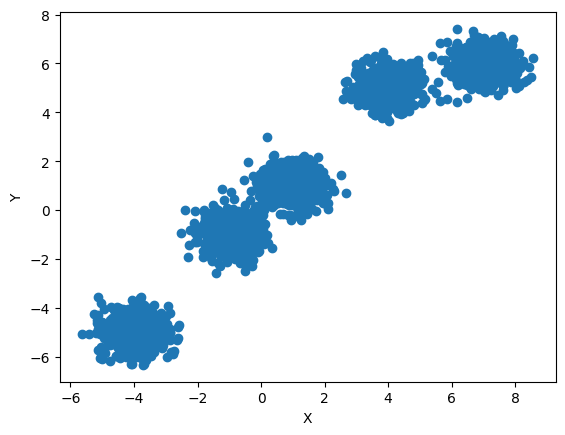

In [2]:
# Load the data

path: str = r"Datasets\Question-2\kmeans_data.npy"

data: np.ndarray = np.load(path)
print(data.shape)

# Plot the data
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [9]:
k: int = 5

# Perform K-Means Clustering
kmeans = KMeans(k)
kmeans.fit(data)
centroids, labels = kmeans.train()

# Perform Silhouette Analysis
sa = SilhouetteAnalysis()
sa.fit(kmeans)
scores = sa.clusterwise_scores()
print("Average Silhouette Score:", sa.mean_score)
for i, score in enumerate(scores, start=1):
    print(f"Average Silhouette Score for Cluster {i}: {score}")

# Plot the data
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()